In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split

2023-08-17 13:44:35.888391: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 13:44:36.427861: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 13:44:36.433592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 13:44:37.837054: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = pd.read_csv('/home/mackland/workspace/ocean_data/bottle.csv')
data.head(2)

/tmp/ipykernel_50691/4135036136.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/mackland/workspace/ocean_data/bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# clean data
df = data[['T_degC', 'Salnty']]
df.rename(
    columns={
        'T_degC': 'Temperature', 
        'Salnty': 'Salinity'
        },
        inplace=True
        )
df = df[:][:500]
df.fillna(method='ffill', inplace=True)
X = np.array(df['Salinity']).reshape(-1, 1)
y = np.array(df['Temperature']).reshape(-1, 1)


/tmp/ipykernel_50691/3927090643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


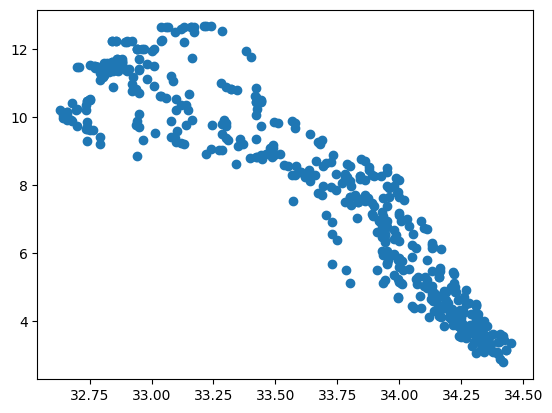

In [5]:
figure = plt.scatter(X, y)
plt.show()

1. Fit the model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_normalizer = Normalization(input_shape=[1,], axis=None)
X_normalizer.adapt(X_train)
model = Sequential([
        X_normalizer,
        Dense(units=1, activation='linear')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
history = model.fit(X_train, y_train, epochs=40, verbose=0, validation_split=0.2)

1/1 [==============================] - 0s 37ms/step


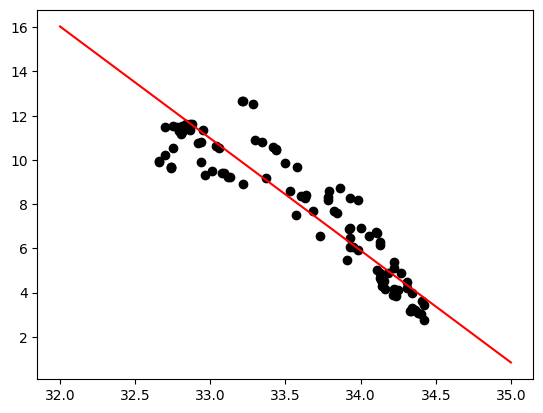

In [24]:
x_eval = tf.linspace(32, 35, 3)
y_eval = model.predict(x_eval)
plt.scatter(X_test, y_test, color='k')
plt.plot(x_eval, y_eval, color='r')
plt.show()

Text(0, 0.5, 'Loss')

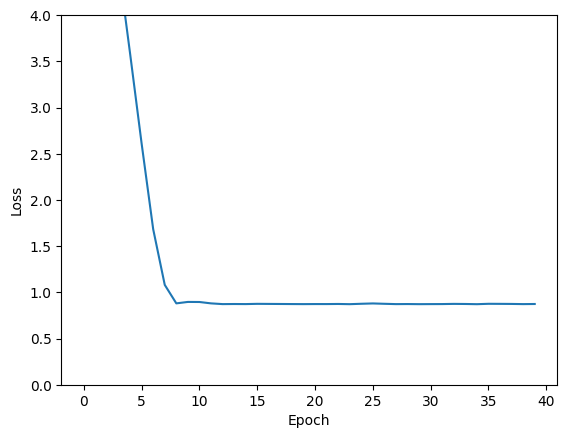

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.ylim([0, 4])
plt.xlabel('Epoch')
plt.ylabel('Loss')